# 머신러닝 복습 

### 머신러닝과 딥러닝의 차이 
- 머신 러닝은 Feature extraction을 해줘야한다.
- 딥 러닝은 그 과정을 하지 않아도 Classification과 같이 수행한다.


### 머신러닝의 학습 방법 

- 지도학습
    - 레이블된 데이터
    - 직접 피드백 

- 비지도학습 
    - 레이블 및 타깃없음
    - 피드백 없음 

### 머신러닝의 학습 방법 
- 1.지도학습
- 정답을 알려주고 학습 시켜주는 방법
    - Classification : 데이터를 여러개의 class로 분류 (아직 배우지 않음)
    - regrssion : 어떤 데이터의 특징을 토대로 값을 예측 (12/19.20)

- 2. 비지도학습
- 정답을 알려주지 않고 비슷한 데이터를 군집화 하면 미래를 예측 


# 사이킷런(scikit-learn) 시작

### API 사용 방법 
- 1. Sciket-Learn으로부터 적절한 estimator 클래스를 임포트해서 모델의 클래스 선택 
     (ex.import sklearn.linear_model import LinearRegression)
- 2. 클래스를 원하는 값으로 인스턴스화해서 모델의 하이퍼파라미터 선택 
- 3. 데이터를 특징 배열과 대상 백터로 배치 (ex. reshape 벡터로 만들어준다)
- 4. 모델 인스턴스의 fit()  메서드를 호출해 모델을 데이터에 적합 (ex. model.fit(x,y))
- 5. 모델을 새 데이터에 대해서 적용 

- 지도 학습 : 대체로 predict() 메서드를 활용해 알려지지 않은 데이터에 대한 레이블 예측
- 비지도 학습 : 대체로 transform()이나 predict() 메서드를 사용해 데이터의 속성을 변환하거나 추론 

### 머신러닝 모델링 과정 

데이터 전처리 -> 데이터 셋 분리 -> 모델생성 및 학습 -> 예측 수행 -> 평가
- 데이터 전처리 : 불필요한 column 을 제거, 데이터를 변환, nan을 제거 또는 대치 (target을 분리하는 작업을 해봄)
- 데이터셋 분리 : 학습데이터, 검증데이터 (train_test_split함수를 활용한 데이터셋 분리 해봤음)
- 모델 생성 : sklearn api -> model 객체 생성 (model.LinearRegression())
- 학습 : model.fit(x_train,y_train)
- 예측 : model.predict(x_test) -> 예측값
- 평가 : 실제모델이 어느정도 성능을 갖고있는가를 측정 

#### Scikit-Learn의 기본 API 사용 순서

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])# 테머

/tmp/ipykernel_1600/3012953313.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])# 테머


In [2]:
x = 10 * np.random.rand(50) # 정규분포에서 난수 생성후 10을 곱해줌
y = 2 * x + np.random.rand(50) # x에 2를 곱한다음 + 난수를 더해준다(noise)
# y = 2 * x # 기울기가 2인 직선

In [3]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True) # model 객체 생성, model의 하이퍼 파라미터 선택 


x.shape #학습시킬 dateset의 shape를 확인 
X = x.reshape((50,1)) #x가 백터형태가 아니므로 백터로 변경해준다.
X.shape #벡터로 변경된 데이터 
y.shape 

#model 학습
model.fit(X, y) # 지도학습이므로 data와 정답을 함께 입력
model.coef_ # 희귀계수, 기울기
model.intercept_ # y절편의 값 

#학습된 model에 학습시킨 데이터를 다시 넣어 확인
y_predict = model.predict(X)


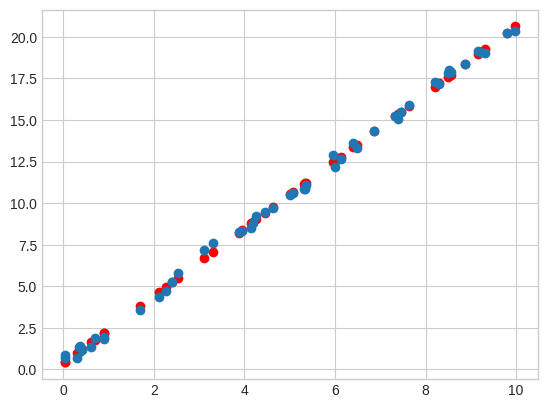

In [4]:
plt.scatter(x, y_predict, c="r")
plt.scatter(x, y)

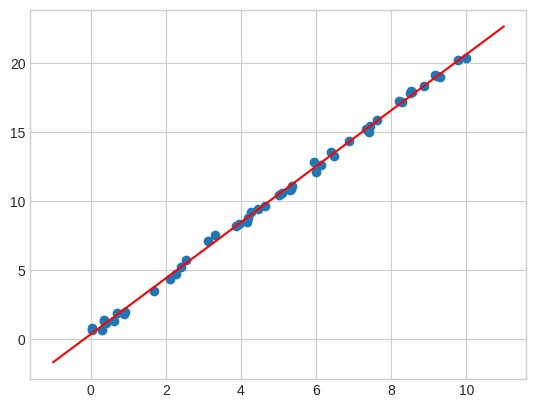

In [5]:
import numpy as np 

x_test = np.linspace(-1, 11, 100) # -1 부터 11까지 데이터 추출(100)
x_test = x_test.reshape((100,1)) 
y_test = model.predict(x_test)
plt.plot(x_test, y_test, c="r")
plt.scatter(x,y)

### 실습 복습 - 유방암 데이터를 이용한 분류 모델 

In [6]:
from sklearn.datasets import load_breast_cancer #모듈로 저장된 데이터셋 불러오기 
load_breast_cancer?

Signature: load_breast_cancer(*, return_X_y=False, as_frame=False)
Docstring:
Load and return the breast cancer wisconsin dataset (classification).

The breast cancer dataset is a classic and very easy binary classification
dataset.

=================   ==============
Classes                          2
Samples per class    212(M),357(B)
Samples total                  569
Dimensionality                  30
Features            real, positive
=================   ==============

The copy of UCI ML Breast Cancer Wisconsin (Diagnostic) dataset is
downloaded from:
https://goo.gl/U2Uwz2

Read more in the :ref:`User Guide <breast_cancer_dataset>`.

Parameters
----------
return_X_y : bool, default=False
    If True, returns ``(data, target)`` instead of a Bunch object.
    See below for more information about the `data` and `target` object.

    .. versionadded:: 0.18

as_frame : bool, default=False
    If True, the data is a pandas DataFrame including columns with
    appropriate dtypes (numeri

In [11]:
breast_cancer = load_breast_cancer() # 함수를 실행하여 dataset load
breast_cancer.data # dataset
breast_cancer.target #Label Data(Target Data)
# 총 569개의 데이터, 30개의 특징
# 이미 vector 
print(breast_cancer.data.shape)

# 총 569개의 Label Data
print(breast_cancer.target.shape)

# 30개의 특징에 대한 feature의 정보(컬럼스)
print(breast_cancer.feature_names)

(569, 30)
(569,)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [14]:
import pandas as pd 
# 데이터 전처리 작업 
data = pd.DataFrame (breast_cancer.data, columns = breast_cancer.feature_names)

In [ ]:
data.info()

data.shape

data.head()

data.nunique()  #넘버의 중복값을 제외하고 찾음

In [21]:
data["target"] = breast_cancer.target
data["target"].nunique()
set(data["target"]) # 0과 1로 이루어진 2개만 존재 

{0, 1}

In [22]:
data["target"].mean() # target값이 1인 데이터에 대한 분포를 알 수 있다. 평균이기 때문에 
# target =1 인 데이터가 62% 존재한다. 

0.6274165202108963

In [25]:
# data의 메인 데이터와 타겟 데이터를 구분해주는 작업이 필요함 (input과 label) 
x_data = data.iloc[:,:-1] #마지막 제외한 행만 가져오기
y_data = data.iloc[:,-1] # 마지막 행만 가져오기 
print(x_data.shape)
print(y_data.shape)

(569, 30)
(569,)


In [ ]:
# 모델 생성 단계 
# LogisticRegression은 2진 분류 모델이다. 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_data,y_data)

In [28]:
(model.predict(x_data) == y_data).mean() # 94%의 정확도 보유

0.9472759226713533

In [30]:
# data를 학습해서 데이터를 평가하는건 자기가 자기를 평가하기 때문에 의미가 없음 
# data 분리한다. 8:2로 분리해서 , train data와 valid data로 분리 
# x_train : 연습문제
# x_vaild : 모의고사

# data.iloc[:int(568*0.8), :-1] # train dataset
# data.iloc[int(568*0.8):, :-1] # test dataset

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_data, y_data, test_size=0.2)
# 4가지로 나누고  연습문제와 모의고사를 80% 20% 로 나눈다


In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(455, 30)
(455,)
(114, 30)
(114,)
